In [1]:
from sklearn.cross_decomposition import PLSRegression

In [2]:
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [2.,5.,4.]]

In [3]:
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]

In [4]:
pls2 = PLSRegression(n_components=2)

In [5]:
pls2.fit(X, Y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [6]:
Y_pred = pls2.predict(X)

In [7]:
Y_pred

array([[  0.26087869,   0.15302213],
       [  0.60667302,   0.45634164],
       [  6.46856199,   6.48931562],
       [ 11.7638863 ,  12.00132061]])

In [8]:
pls2.score(X, Y)

0.9936603710735793

In [12]:
import numpy as np

In [14]:
Yarr = np.asarray(Y)

In [15]:
Yarr[:,0]

array([  0.1,   0.9,   6.2,  11.9])

In [9]:
import matplotlib.pyplot as plt

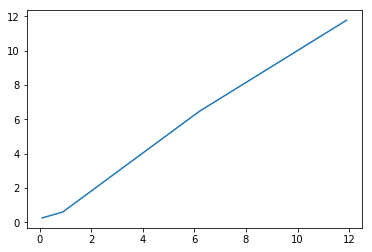

In [16]:
plt.plot(Yarr[:,0],Y_pred[:,0])

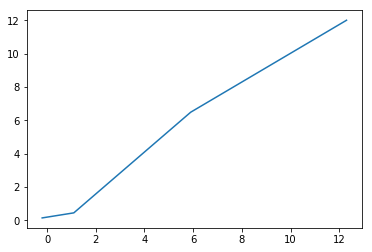

In [17]:
plt.plot(Yarr[:,1],Y_pred[:,1])

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('D:/sglee/DseyKorea/data/open_data/Hitters.csv').dropna()

In [33]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [34]:
y = df.Salary

In [35]:
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [36]:
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [37]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  


In [38]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [40]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


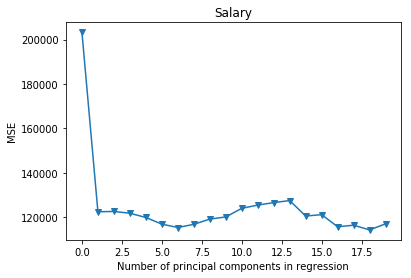

In [41]:
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


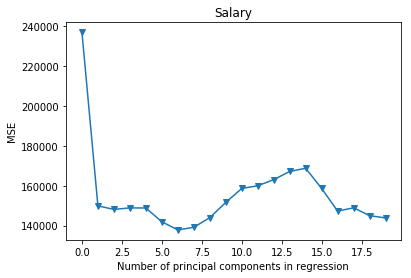

In [42]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [43]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


111994.42273636984

In [44]:
# 6.7.2 Partial Least Squares

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function

(-1, 19.899999999999999)

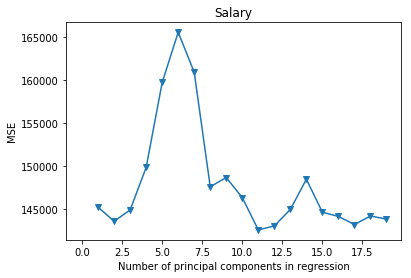

In [45]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [46]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


104838.51042760804

In [2]:
X = np.mat([[-1.193,	1.5012,	-1.03], [-0.037,	0.354,	-0.7647], [-0.5919,	-0.091,	-0.3257], [0.3792,	-0.714,	1.0739], [1.4427,	-1.0502,	1.0464]])
X

matrix([[-1.193 ,  1.5012, -1.03  ],
        [-0.037 ,  0.354 , -0.7647],
        [-0.5919, -0.091 , -0.3257],
        [ 0.3792, -0.714 ,  1.0739],
        [ 1.4427, -1.0502,  1.0464]])

In [3]:
y = np.mat([[-1.1841], [-0.2161], [-0.5457], [0.5485], [1.3973]])
y

matrix([[-1.1841],
        [-0.2161],
        [-0.5457],
        [ 0.5485],
        [ 1.3973]])

In [4]:
W = np.mat([[0.613577138,0.789179813,	0.005526153], [-0.528563193,	0.38526164,	0.155968198], [0.586637918,	-0.478297702,	0.134748071]])
W

matrix([[ 0.61357714,  0.78917981,  0.00552615],
        [-0.52856319,  0.38526164,  0.1559682 ],
        [ 0.58663792, -0.4782977 ,  0.13474807]])

In [6]:
P = np.mat([[0.575467211,0.296013231,-1.154695331], [-0.547167689,0.679278215,3.041505672], [0.609735177,-1.055184862,3.948129733]])
P

matrix([[ 0.57546721,  0.29601323, -1.15469533],
        [-0.54716769,  0.67927821,  3.04150567],
        [ 0.60973518, -1.05518486,  3.94812973]])

In [7]:
q = np.mat([0.784120985,	0.62449431,	1.016594405])
q

matrix([[ 0.78412099,  0.62449431,  1.0165944 ]])

In [8]:
T = np.mat([[-1.594023043,	0.087162916,	0.050065067], [-0.505592256,	0.364699564,	-0.043021342], [-0.392622207,	-0.254492672,	-0.04735302], [0.942906681,	-0.375741479,	0.037911861], [1.549330825,	0.17837167,	0.002397434]])
T

matrix([[-1.59402304,  0.08716292,  0.05006507],
        [-0.50559226,  0.36469956, -0.04302134],
        [-0.39262221, -0.25449267, -0.04735302],
        [ 0.94290668, -0.37574148,  0.03791186],
        [ 1.54933082,  0.17837167,  0.00239743]])

In [19]:
b = np.mat([[0.74125913], [-0.010806479], [0.23693031]])
b

matrix([[ 0.74125913],
        [-0.01080648],
        [ 0.23693031]])

In [32]:
XW = X*W
XW

matrix([[-2.12971365,  0.12950989,  0.08875625],
        [-0.65841574,  0.47293722, -0.04803358],
        [-0.50614503, -0.34639278, -0.06135148],
        [ 1.24005303, -0.48946373,  0.03544018],
        [ 2.05416272,  0.23345723, -0.01482484]])

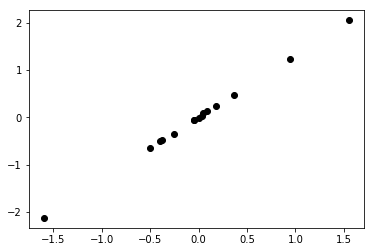

In [31]:
plt.plot(T, XW, 'o', color='black');

In [33]:
y_hat = T*b
y_hat

matrix([[-1.17066413],
        [-0.38890905],
        [-0.29950399],
        [ 0.7119811 ],
        [ 1.14709607]])

In [34]:
y_hat2 = XW*b
y_hat2

matrix([[-1.55904019],
        [-0.50454807],
        [-0.38597736],
        [ 0.93288686],
        [ 1.51663157]])

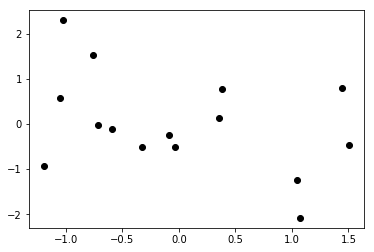

In [18]:
plt.plot(X, TP, 'o', color='black');

In [27]:
y_hat = T * b
y_hat

matrix([[-1.17066413],
        [-0.38890905],
        [-0.29950399],
        [ 0.7119811 ],
        [ 1.14709607]])

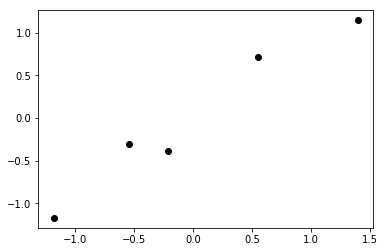

In [21]:
plt.plot(y, y_hat, 'o', color='black');

In [22]:
y_hat2 = XW*b
y_hat2

matrix([[-1.55904019],
        [-0.50454807],
        [-0.38597736],
        [ 0.93288686],
        [ 1.51663157]])

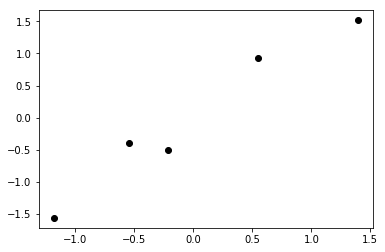

In [23]:
plt.plot(y, y_hat2, 'o', color='black');

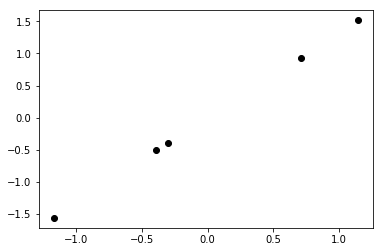

In [25]:
plt.plot(y_hat, y_hat2, 'o', color='black');

In [26]:
y_hat-y_hat2

matrix([[ 0.38837606],
        [ 0.11563902],
        [ 0.08647337],
        [-0.22090576],
        [-0.36953549]])

In [28]:
TW = T*W
TW

matrix([[-0.99475714, -1.24833629,  0.011532  ],
        [-0.52822457, -0.23792144,  0.04829051],
        [-0.13416763, -0.38524694, -0.04824318],
        [ 0.79938963,  0.58123098, -0.04828452],
        [ 0.8577597 ,  1.29027369,  0.0367052 ]])

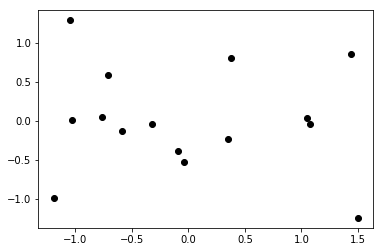

In [29]:
plt.plot(X, TW, 'o', color='black');

In [35]:
HDS_T = np.mat([[-1.72898528173103,-0.478003076805184,-0.647801077120278,-0.126036172651521,-0.0961838045914904],[-0.964714183090846,-0.432169584522629,0.295760179646572,0.194692995984076,-0.219729346733983],[1.04517607671384,2.22882686193483,-0.926939028123341,1.21999837151465,1.25481490249005],[-0.34236474516173,-0.991756485555052,0.172125628541928,-0.695340320795143,-0.641411033627771],[-2.15388840556264,0.934948928884428,-0.0229096273417073,0.178128360955542,0.606796684164209],[-0.169782251482659,-0.227862449565015,0.65081907566853,-0.352801522474658,-0.183485401674387],[-1.59642218940855,0.24178415710607,0.076163354460539,-0.42153944169553,0.181003079145677],[-0.791581101805188,-0.377633128857914,-0.527764649092836,0.255360605852166,-0.168152131667595],[0.867698127171981,-0.179946508887069,0.0428259239234994,-0.020450413769843,-0.128228576946073],[0.29041355914051,0.508714828401366,0.468626706034286,0.597462391543999,0.301618953533963],[-0.638710530991161,0.047778751988311,0.0177639369826929,-0.105276271215956,0.105559769107669],[-0.547567179811202,0.73497356667792,0.748835873589832,0.189393941120017,0.42248595400794],[-0.358775290694292,0.814442190580925,-0.248481683515289,0.369962854033427,0.465366769194203],[-0.905424181741547,0.698537928575174,0.954774403023595,0.52513545246331,0.345466050150967],[0.482809571242635,0.007449026531064,-0.23967315324446,0.00901065081925975,0.0450502859038654],[0.584630914398581,1.12876912380558,0.118881743401422,0.697727818477031,0.540271420920624],[-0.932020815118009,0.941572361255814,1.86687313686818,-0.206259731457441,0.46172588862062],[-0.612137498757506,-2.96004354490757,-0.284725200203272,-1.16769237860454,-1.65798008746926],[-7.0596329956039,4.2504808424859,-1.75765589999522,2.06734968319028,2.45699912137873],[-1.38583631983786,-0.602588742473205,0.416377794325836,-0.526905700920675,-0.319830200432481],[1.26440821290231,1.80674262291067,-1.92084219633977,1.03042645997015,1.03853761394993],[-1.40305823652866,0.106620857630648,0.311567464621082,-0.121734210709554,0.191461865734442],[0.231242916356,1.06980242674748,-1.47571998851965,0.566686218503149,0.69934381146789],[-0.450946439941974,0.915741126923082,0.0394502436181945,0.629897888373001,0.512797208197414],[-0.138027578319996,-0.0877430895346618,-0.642188252027729,0.283937155011578,0.0672901191198137],[0.155269157476373,0.49985590890034,-0.115590367635381,0.0847712364778346,0.155748430029843],[0.629288499955483,-0.0666657859945579,0.641294325033556,0.124431967906384,-0.0375551780492284],[-0.490831917892688,-1.21147201951997,0.0210368224290892,-0.393508272437527,-0.577413568715866],[-0.825046639439412,0.269341513356177,1.24702883051452,-0.546050643808622,0.160516434064541],[0.875142188910931,0.785446367104125,-0.398576773706211,0.680445557033575,0.341195123507561],[-0.714163057400474,-0.179089861540258,-0.71108747285906,-0.326984060007767,0.114614762292154],[0.196062564868196,-0.0805381204524272,0.569173227629811,0.00375790020722083,-0.0121558941602766],[-0.0229271720291915,-0.449365013064915,0.156707946765,-0.246230537641987,-0.162175189397845],[1.86899538951427,1.43710102751045,-0.0845267476072327,0.126625669669274,0.793951956488756],[0.559436351775586,0.102497741596159,-1.03155810414224,0.190400122661435,0.162841739760126],[-1.59759788777874,0.896525498387004,-0.321940138341418,0.183941055551889,0.461096210689248],[-0.150742394552476,-1.05833794385024,0.0431451831701496,-0.341905212410459,-0.548095395527559],[-1.54904362046365,0.680372889610082,0.542075263691479,-0.474934488938668,0.464784404261725],[-0.155754855320774,-0.140957590743832,-0.291543003091595,-0.0681933896984749,0.0115738294603921],[0.0315184711479873,0.214460548691604,-1.30963668672691,0.828269424382257,0.34556640099467],[-2.00233119681857,0.959208493512624,0.514966585172724,0.48639091762657,0.633900490286869],[-1.1275512432708,0.17059517226742,-0.879435453627541,0.34386974611444,0.269519786597831],[0.985055656288223,0.16825934779638,-0.85075379697161,0.0683534045208065,0.0171524096868558],[1.52237046608513,0.623880680008726,-0.267037434799381,0.490947761302313,0.343944265503206],[-0.322839666588229,0.805887028761749,0.704132491286583,-0.0499210599518301,0.404546202414274],[-0.907038205123714,-1.11842799997685,0.345179181831666,-0.277456228087213,-0.497716303807605],[-2.49664879113243,-0.642244535444415,0.295951644115225,-0.351368103132876,-0.312626423128987],[-0.486287543546932,0.370410497947371,0.138910035519912,-0.0215721954841662,0.102360107870523],[-0.0110900712413606,-0.812672436908916,0.767905243211374,-0.533871201570843,-0.498385852023792],[1.66034784160569,1.11687056033266,0.0787035763420969,0.315215025361464,0.316886340297864],[-0.720739373088078,-0.809302020170726,0.72123185865942,-0.621447678270841,-0.65597867927217],[0.575857797165542,-0.0460055480984903,-0.0119486253083805,0.250266091967919,0.113940334440311],[1.01475918658265,-0.719373625353615,0.352178156365887,-0.184740132739446,-0.636249883908818],[1.18256318517597,0.783218045019166,-0.631702251809636,-0.271672206390849,0.355914296658777],[1.741468928129,0.21552272551457,-0.949462623609996,0.567996382286596,0.0972589209679067],[1.49221123265876,-1.28792267590763,-0.191889041154988,0.130856128579328,-0.754828715385106],[0.27031370578534,-0.408174219483642,1.15417768900941,-0.7690101496919,-0.255187525928215],[1.46179789892083,-0.817554016708312,0.411296968385094,-0.623301924101496,-0.549808248805208],[2.42916082089432,-1.39882501899327,-0.481069890015529,-0.250707779704268,-0.839781999241935],[2.03250558327615,-0.643337001397739,0.0971724839469242,0.181470962235903,-0.48229970467689],[1.0367971498291,-0.782979308815868,1.10211957749342,-0.729471865354336,-0.593242106417336],[1.01010462314775,-1.48552063286452,-0.324466906738406,-0.813098044816505,-0.541731668631984],[0.35618162278885,-1.13350307642075,1.1670820350425,-0.857343044343231,-0.658126069703283],[1.01923334798828,-0.990223765839616,-0.0105478151962512,-0.0373368208016118,-0.617935462034974],[0.271988971510994,-1.15703386886962,0.109411037663744,-0.800970955164921,-0.565281942714355],[2.24980943352716,-0.421763594749059,0.225525027258785,0.187080382782682,-0.503273930569236],[2.20526453318488,0.0431975796031389,-0.664916209026512,0.337122779797061,0.0680334552929758],[1.49233334774308,-1.57704062284734,0.0670527591183372,-0.632347547834703,-1.04397338460836],[0.668291527413863,-0.803760313234094,0.56808668352894,-0.429903657597168,-0.673111688802325]])
HDS_T

matrix([[ -1.72898528e+00,  -4.78003077e-01,  -6.47801077e-01,
          -1.26036173e-01,  -9.61838046e-02],
        [ -9.64714183e-01,  -4.32169585e-01,   2.95760180e-01,
           1.94692996e-01,  -2.19729347e-01],
        [  1.04517608e+00,   2.22882686e+00,  -9.26939028e-01,
           1.21999837e+00,   1.25481490e+00],
        [ -3.42364745e-01,  -9.91756486e-01,   1.72125629e-01,
          -6.95340321e-01,  -6.41411034e-01],
        [ -2.15388841e+00,   9.34948929e-01,  -2.29096273e-02,
           1.78128361e-01,   6.06796684e-01],
        [ -1.69782251e-01,  -2.27862450e-01,   6.50819076e-01,
          -3.52801522e-01,  -1.83485402e-01],
        [ -1.59642219e+00,   2.41784157e-01,   7.61633545e-02,
          -4.21539442e-01,   1.81003079e-01],
        [ -7.91581102e-01,  -3.77633129e-01,  -5.27764649e-01,
           2.55360606e-01,  -1.68152132e-01],
        [  8.67698127e-01,  -1.79946509e-01,   4.28259239e-02,
          -2.04504138e-02,  -1.28228577e-01],
        [  2.904135

In [36]:
HDS_W = np.mat([[0.296346938864061,-0.288426879411957,0.00678877451149437,-0.16181805140137,-0.187007925949239],[-0.317027104257292,0.15783539645037,-0.0237855312298543,0.0545953617300677,0.0828876223058499],[-0.326187259286582,0.225904256537691,-0.0463184487467971,0.115288999749636,0.145609333464804],[-0.302441549075054,0.293877744162261,-0.104825665687607,0.0683478601553028,0.12337197950699],[-0.270347346968453,0.0341130096674175,-0.00170571762140861,-0.0564832274735637,0.0244466432577794],[-0.261881977574649,0.284669877202839,-0.0213433998643718,0.174717227067408,0.188834738787137],[-0.241057274277737,-0.0301850420509848,-0.0470406247749072,0.0162910845828476,0.00744921193876854],[-0.237936982679252,-0.0191939750743638,-0.200676187888987,-0.0252477298228581,0.0186041127269524],[-0.209429364783304,-0.246165680404526,0.0702153275446458,-0.0624331603152437,-0.106653417238222],[-0.196220688431251,-0.0958362757585205,-0.0950252664827769,-0.0794093070074924,-0.011768481206173],[-0.0795432928708108,0.0117345383775364,0.0444997143726817,0.00135235738344861,0.00483541620204888],[-0.197428365810769,-0.526449240053891,-0.195116968308402,-0.267228316812079,-0.279448924622128],[0.272283580874086,0.321397879525134,-0.0310730567704979,0.060260514266475,0.149111836637516],[-0.142771136970394,-0.101929932776049,-0.0773235358956656,-0.199160523339133,-0.11398303185354],[-0.192459426715285,-0.0373541304583163,0.228924604235077,-0.167200895273294,-0.0318908014666187],[-0.208998500247989,-0.305045472901863,0.24738928839471,-0.0727731491806183,-0.167772351885194],[-0.187011616471861,-0.0682005025747928,0.232200371735372,-0.162306634751619,-0.0286236466406119],[-0.0362411979536259,0.053363883971125,0.0961407957552263,0.0620393686553076,0.0418447461954337],[0.134833244890858,0.10827656042582,-0.141927859802813,-0.00389673999350068,0.0982875729231449],[-0.00572514974956718,0.310797422288119,0.209059342770453,0.156862487769625,0.166065159384805]])
HDS_W

matrix([[ 0.29634694, -0.28842688,  0.00678877, -0.16181805, -0.18700793],
        [-0.3170271 ,  0.1578354 , -0.02378553,  0.05459536,  0.08288762],
        [-0.32618726,  0.22590426, -0.04631845,  0.115289  ,  0.14560933],
        [-0.30244155,  0.29387774, -0.10482567,  0.06834786,  0.12337198],
        [-0.27034735,  0.03411301, -0.00170572, -0.05648323,  0.02444664],
        [-0.26188198,  0.28466988, -0.0213434 ,  0.17471723,  0.18883474],
        [-0.24105727, -0.03018504, -0.04704062,  0.01629108,  0.00744921],
        [-0.23793698, -0.01919398, -0.20067619, -0.02524773,  0.01860411],
        [-0.20942936, -0.24616568,  0.07021533, -0.06243316, -0.10665342],
        [-0.19622069, -0.09583628, -0.09502527, -0.07940931, -0.01176848],
        [-0.07954329,  0.01173454,  0.04449971,  0.00135236,  0.00483542],
        [-0.19742837, -0.52644924, -0.19511697, -0.26722832, -0.27944892],
        [ 0.27228358,  0.32139788, -0.03107306,  0.06026051,  0.14911184],
        [-0.14277114, -0.

In [37]:
HDS_y = np.mat([[0.0394],[0.0402],[0.0424],[0.0413],[0.0397],[0.0408],[0.0404],[0.0404],[0.0421],[0.043],[0.0408],[0.0408],[0.0411],[0.041],[0.0415],[0.0428],[0.0413],[0.0396],[0.0375],[0.0396],[0.0422],[0.0407],[0.0419],[0.0413],[0.0416],[0.0408],[0.0418],[0.0404],[0.0405],[0.0421],[0.0401],[0.042],[0.0404],[0.0439],[0.0416],[0.0404],[0.041],[0.0404],[0.0418],[0.0418],[0.0401],[0.0406],[0.0415],[0.0427],[0.0412],[0.041],[0.0394],[0.0416],[0.0416],[0.0427],[0.0408],[0.0414],[0.0416],[0.0423],[0.0422],[0.0415],[0.042],[0.0422],[0.0429],[0.0429],[0.0419],[0.0412],[0.041],[0.0416],[0.041],[0.0434],[0.0432],[0.0406],[0.0417]]
)
HDS_y

matrix([[ 0.0394],
        [ 0.0402],
        [ 0.0424],
        [ 0.0413],
        [ 0.0397],
        [ 0.0408],
        [ 0.0404],
        [ 0.0404],
        [ 0.0421],
        [ 0.043 ],
        [ 0.0408],
        [ 0.0408],
        [ 0.0411],
        [ 0.041 ],
        [ 0.0415],
        [ 0.0428],
        [ 0.0413],
        [ 0.0396],
        [ 0.0375],
        [ 0.0396],
        [ 0.0422],
        [ 0.0407],
        [ 0.0419],
        [ 0.0413],
        [ 0.0416],
        [ 0.0408],
        [ 0.0418],
        [ 0.0404],
        [ 0.0405],
        [ 0.0421],
        [ 0.0401],
        [ 0.042 ],
        [ 0.0404],
        [ 0.0439],
        [ 0.0416],
        [ 0.0404],
        [ 0.041 ],
        [ 0.0404],
        [ 0.0418],
        [ 0.0418],
        [ 0.0401],
        [ 0.0406],
        [ 0.0415],
        [ 0.0427],
        [ 0.0412],
        [ 0.041 ],
        [ 0.0394],
        [ 0.0416],
        [ 0.0416],
        [ 0.0427],
        [ 0.0408],
        [ 0.0414],
        [ 0.

In [42]:
HDS_TI = HDS_T.I

In [46]:
HDS_TI.shape

(5, 69)

In [47]:
HDS_y.shape

(69, 1)

In [48]:
HDS_TI*HDS_y

matrix([[  7.60773962e-04],
        [  5.01616780e-05],
        [  2.91491381e-04],
        [  2.94268014e-04],
        [  4.43353984e-04]])

In [49]:
HDS_b = np.mat([[0.00587969625257126],[-0.00155284761022523],[-0.00119222376969728],[-0.000823424540769551],[-0.00944103528238967],[-0.000722025182645375],[-0.000739727330195182],[-0.014420268201197],[-0.000144916248180528],[-0.00542113835903468],[-4.81857432588362E-06],[-0.0367797295992716],[0.0340361225749913],[-9.61658758902371E-06],[-0.0425698167395471],[-5.68689855718197E-05],[-0.0235469947505949],[3.36470445347896E-06],[0.00272318223716074],[0.000197141224207852]])
HDS_b

matrix([[  5.87969625e-03],
        [ -1.55284761e-03],
        [ -1.19222377e-03],
        [ -8.23424541e-04],
        [ -9.44103528e-03],
        [ -7.22025183e-04],
        [ -7.39727330e-04],
        [ -1.44202682e-02],
        [ -1.44916248e-04],
        [ -5.42113836e-03],
        [ -4.81857433e-06],
        [ -3.67797296e-02],
        [  3.40361226e-02],
        [ -9.61658759e-06],
        [ -4.25698167e-02],
        [ -5.68689856e-05],
        [ -2.35469948e-02],
        [  3.36470445e-06],
        [  2.72318224e-03],
        [  1.97141224e-04]])

In [2]:
dw_T = np.mat([[-1.76684538934945,0.13119740388398,-0.000420878987103716,0.904098120850372],[-1.64099995084076,0.0987278669149501,-0.000925958169727716,0.679814323400961],[-0.414543553443289,-0.0703955339838507,0.00016857602239604,-0.48746830238135],[-0.938810209652307,-0.0145973230492114,-1.51104969252949E-05,-0.102563746709354],[-2.18273388465149,0.22365477351833,-0.000607635581253396,1.54267734437989],[-0.893727653907816,-0.0174858228997138,0.000283058685386682,-0.12246605085029],[-1.26213326864061,0.0369869378243537,-2.72502202012794E-05,0.253557103615558],[-1.23466140452743,0.0341059462850918,0.000145240177953296,0.233673285090367],[-0.124511757714411,-0.0827104095953522,0.000318217909634922,-0.572120616900309],[-0.436362130163163,-0.0680945248646091,0.000238266236741298,-0.471605577904898],[-1.13387807576373,0.0149484777242269,-4.81855605431303E-05,0.101395947743723],[-0.836125788075635,-0.026644394128934,0.000166664084072349,-0.185684405776635],[-0.56453745704446,-0.0550406574223869,0.000408684355944399,-0.381573783648148],[-0.827386803789967,-0.0252645634297197,0.000389052836769279,-0.176144805545994],[-2.27681416027691,0.248310096319934,-0.000458152874855982,1.71299527194306],[-1.17345870357744,0.0248913024170148,0.000227290762590808,0.17007802845754],[-0.816452012859893,-0.0232455193718589,0.000681076825694121,-0.162168153566334],[-0.462351223091608,-0.0640127348432499,0.000411585723603699,-0.443429511983052],[-0.560223991571728,-0.0552655146293747,0.00041841109471915,-0.383116449477627],[-0.455858064453037,-0.064506309669165,0.000419396289177126,-0.446830857141049],[0.288881097196705,-0.0750943364882701,-9.23177958632345E-07,-0.518736239170416],[-0.560225925378656,-0.0550761472862586,0.000417501589816462,-0.381789462258643],[0.110787335965246,-0.0835891228024268,0.000135606056484222,-0.577780642043729],[0.742782508773264,-0.0054567245380605,-0.000361603717746121,-0.0364445729423004],[0.747915059653549,-0.0029900290836462,-0.000282592848322982,-0.019364579053888],[0.740284088224916,-0.00583013994532867,-0.000349179753603988,-0.0390228348136287],[0.747634498744043,-0.00581222020249986,-0.000521196351398255,-0.0388765325588489],[0.750165263641665,-0.00520342368213399,-0.000514114529321395,-0.0346744496199548],[0.722914511733402,-0.00585329185567769,3.7011087535373E-05,-0.0392221100969648],[0.750582899557263,-0.00103401517780146,-0.000153381577169555,-0.00585078910795402],[0.753196629802056,0.000662592981409547,-7.22704440310648E-05,0.00589351571366676],[0.761122103383972,0.00371461473150274,1.37942012726803E-05,0.027009718853717],[0.766165016147053,0.00498880659219892,-3.27818461803541E-06,0.0358325291833701],[0.73546917697934,-0.0049482548271556,-0.000164197223450833,-0.0329324159400049],[0.761173591752472,0.00417123186167266,5.63294992342494E-05,0.030161972784001],[0.760912118393507,0.00150828223853744,-0.000169423460217075,0.0117471961408234],[0.745847415152593,0.000820731660967567,0.000109624100103314,0.00697215924495033],[0.75061875254674,-0.000586550944328791,-0.000120894762367059,-0.00275010542514017],[0.747911545159517,-0.00316818464346037,-0.000280560661088393,-0.020605968658738],[0.740823689319739,-0.00041550707130603,0.000120117574548506,-0.00158686053186135],[0.740743727975788,-0.00118759268178538,5.09701510109622E-05,-0.0069222654732997],[0.745556833989172,-0.00221271920604495,-0.000136367697399255,-0.0140089685155293],[0.740463022635213,-0.00410094836955343,-0.000190945742931655,-0.0270701983803008],[0.750885317181269,0.00213725188729712,0.00010979843607517,0.0160868252832118],[0.745935789524014,0.00170795943440393,0.00018842821873205,0.0131069847235115],[0.745765082841996,1.15792570607544E-05,4.32226878004541E-05,0.00137959529416267],[0.753220996747042,0.000905703988527807,-5.20914144526123E-05,0.00757356546378371],[0.741012486810073,0.00138752729454491,0.000280869026436905,0.0108714319290709],[0.740476928776455,-0.00381979521833602,-0.000177293832658639,-0.0251149675238353],[0.733393920165738,-0.00119677490448826,0.000214693635612565,-0.00699869609555493]]
)
dw_T

matrix([[ -1.76684539e+00,   1.31197404e-01,  -4.20878987e-04,
           9.04098121e-01],
        [ -1.64099995e+00,   9.87278669e-02,  -9.25958170e-04,
           6.79814323e-01],
        [ -4.14543553e-01,  -7.03955340e-02,   1.68576022e-04,
          -4.87468302e-01],
        [ -9.38810210e-01,  -1.45973230e-02,  -1.51104969e-05,
          -1.02563747e-01],
        [ -2.18273388e+00,   2.23654774e-01,  -6.07635581e-04,
           1.54267734e+00],
        [ -8.93727654e-01,  -1.74858229e-02,   2.83058685e-04,
          -1.22466051e-01],
        [ -1.26213327e+00,   3.69869378e-02,  -2.72502202e-05,
           2.53557104e-01],
        [ -1.23466140e+00,   3.41059463e-02,   1.45240178e-04,
           2.33673285e-01],
        [ -1.24511758e-01,  -8.27104096e-02,   3.18217910e-04,
          -5.72120617e-01],
        [ -4.36362130e-01,  -6.80945249e-02,   2.38266237e-04,
          -4.71605578e-01],
        [ -1.13387808e+00,   1.49484777e-02,  -4.81855605e-05,
           1.01395948e-01],

In [3]:
dw_P = np.mat([[-0.372220714474187,1.84959681885932,120.318114451548,0.265426163434823],[-0.928533741695766,6.7494141107141,-52.1168923543803,0.97203563161225],[0.00148900767577548,-0.0054285992148506,0.333817441708662,-0.000775835912504175],[0.0111958720757874,-0.0418696251494231,10.0683468701305,-0.00598615918831366],[0.0114490733817723,-0.0532337545801161,13.4648499659584,-0.00763365253380143],[0.00161183689462586,-0.00233677573826629,-0.257756281243324,-0.000326135388216044],[0.000989065072316248,-0.00300580377700098,0.291695557822821,-0.000428248900679975]])
dw_P

matrix([[ -3.72220714e-01,   1.84959682e+00,   1.20318114e+02,
           2.65426163e-01],
        [ -9.28533742e-01,   6.74941411e+00,  -5.21168924e+01,
           9.72035632e-01],
        [  1.48900768e-03,  -5.42859921e-03,   3.33817442e-01,
          -7.75835913e-04],
        [  1.11958721e-02,  -4.18696251e-02,   1.00683469e+01,
          -5.98615919e-03],
        [  1.14490734e-02,  -5.32337546e-02,   1.34648500e+01,
          -7.63365253e-03],
        [  1.61183689e-03,  -2.33677574e-03,  -2.57756281e-01,
          -3.26135388e-04],
        [  9.89065072e-04,  -3.00580378e-03,   2.91695558e-01,
          -4.28248901e-04]])

In [4]:
dw_Q = np.mat([5.27907551036061,36.5587545579862,4512.52530006339,2.04862030562554])
dw_Q

matrix([[  5.27907551e+00,   3.65587546e+01,   4.51252530e+03,
           2.04862031e+00]])

In [5]:
dw_T.shape, dw_P.shape, dw_Q.shape

((50, 4), (7, 4), (1, 4))

In [6]:
dw_TPT = dw_T*dw_P.T
dw_TPT

matrix([[  1.08965068e+00,   3.42683166e+00,  -4.18499301e-03,
          -3.49241920e-02,  -3.97815162e-02,  -3.34081969e-03,
          -2.65182627e-03],
        [  8.62451889e-01,   2.89914089e+00,  -3.81594090e-03,
          -3.58984691e-02,  -4.17009381e-02,  -2.85876912e-03,
          -2.48103995e-03],
        [ -8.50057502e-02,  -5.72833151e-01,   1.99359639e-04,
           2.92160275e-03,   4.99229351e-03,  -3.88148883e-04,
           5.95152538e-05],
        [  2.93404276e-01,   6.74285474e-01,  -1.24412410e-03,
          -9.43778938e-03,  -9.39196124e-03,  -1.44175377e-03,
          -8.45152552e-04],
        [  1.56248729e+00,   5.06748617e+00,  -5.86394348e-03,
          -4.91545488e-02,  -5.68542485e-02,  -4.38734184e-03,
          -3.66902269e-03],
        [  3.01873617e-01,   5.78043719e-01,  -1.04634033e-03,
          -5.69090133e-03,  -4.55531148e-03,  -1.43270240e-03,
          -6.96382941e-04],
        [  6.02225064e-01,   1.66946022e+00,  -2.28592869e-03,
          -1.

In [7]:
dw_W = np.mat([[-0.400078084730866,-0.887433055316278,0.00485052763742949,-6.13690599862006],[-0.916174943181891,0.393705731163782,-0.00158748644569273,2.72070569067267],[0.00213647974221093,0.0206260716232174,0.00162544306472077,0.142954403230132],[0.0165681695817885,0.171141581057008,0.0141874080109321,1.18356235941793],[0.016435783886095,0.158858201547857,0.0141870542922786,1.09778330890904],[0.00311702604093013,0.0479497738166229,0.00414340812829326,0.333153659316342],[0.00144221061938524,0.0144355455534063,0.00107607413100387,0.09996173214147]])
dw_W

matrix([[ -4.00078085e-01,  -8.87433055e-01,   4.85052764e-03,
          -6.13690600e+00],
        [ -9.16174943e-01,   3.93705731e-01,  -1.58748645e-03,
           2.72070569e+00],
        [  2.13647974e-03,   2.06260716e-02,   1.62544306e-03,
           1.42954403e-01],
        [  1.65681696e-02,   1.71141581e-01,   1.41874080e-02,
           1.18356236e+00],
        [  1.64357839e-02,   1.58858202e-01,   1.41870543e-02,
           1.09778331e+00],
        [  3.11702604e-03,   4.79497738e-02,   4.14340813e-03,
           3.33153659e-01],
        [  1.44221062e-03,   1.44355456e-02,   1.07607413e-03,
           9.99617321e-02]])

In [9]:
dw_TPT*dw_W

matrix([[ -3.57677831e+00,   3.69589836e-01,  -1.23803276e-03,
           2.54933379e+00],
        [ -3.00246914e+00,   3.63020211e-01,  -1.54063727e-03,
           2.50491035e+00],
        [  5.58954077e-01,  -1.48811348e-01,   6.08097863e-04,
          -1.02799463e+00],
        [ -7.35467179e-01,   1.87922057e-03,   7.66989941e-05,
           1.17146512e-02],
        [ -5.26960111e+00,   5.90667045e-01,  -2.00130599e-03,
           4.07504305e+00],
        [ -6.50539053e-01,  -4.21114319e-02,   3.92857765e-04,
          -2.92315957e-01],
        [ -1.77106571e+00,   1.16703656e-01,  -2.57022107e-04,
           8.03874247e-01],
        [ -1.70381870e+00,   8.87888074e-02,  -6.65738552e-05,
           6.10970967e-01],
        [  1.01866523e+00,  -2.00965058e-01,   8.34346693e-04,
          -1.38781619e+00],
        [  5.05385787e-01,  -1.52129364e-01,   6.63453613e-04,
          -1.05103094e+00],
        [ -1.33848866e+00,   7.11791820e-02,  -1.40560802e-04,
           4.89844967e-01],

In [8]:
dw_X = np.mat([[9.66484958,15754,8.337587942,4065,4267,8.309430742,8.259458195],[9.624963418,15138,8.335911094,4053,4255,8.309430742,8.259458195],[9.139273924,9314,8.336869637,4077,4264,8.307212627,8.263332667],[9.373054282,11767,8.333751007,4071,4264,8.307952545,8.258681496],[9.786560401,17793,8.334471555,4068,4267,8.310169022,8.265907334],[9.354873523,11555,8.336150816,4074,4273,8.307952545,8.26178468],[9.49634604,13311,8.336869637,4071,4267,8.310906757,8.260234292],[9.486455808,13180,8.335431478,4068,4277,8.311889558,8.26178468],[8.98619632,7992,8.338305731,4077,4273,8.310169022,8.263332667],[9.150059441,9415,8.338305731,4071,4273,8.308691917,8.260234292],[9.449042262,12696,8.336869637,4068,4267,8.312626026,8.26178468],[9.330963814,11282,8.336150816,4071,4270,8.312626026,8.26178468],[9.211339872,10010,8.334471555,4071,4280,8.310414994,8.259458195],[9.327412044,11242,8.339023006,4071,4280,8.307952545,8.262558973],[9.812358619,18258,8.338305731,4077,4267,8.308691917,8.26178468],[9.46397433,12887,8.338305731,4080,4267,8.310169022,8.264105764],[9.322954516,11192,8.338305731,4077,4286,8.309430742,8.262558973],[9.162829389,9536,8.337587942,4074,4277,8.309430742,8.263332667],[9.209339872,9990,8.339023006,4074,4277,8.309430742,8.263332667],[9.159678457,9506,8.337587942,4071,4280,8.312626026,8.264105764],[8.726643416,6165,8.340456013,4074,4273,8.311889558,8.265907334],[9.209339872,9990,8.340456013,4083,4267,8.311889558,8.264878263],[8.845345196,6942,8.339023006,4077,4270,8.311889558,8.264105764],[8.361007108,4277,8.336869637,4074,4283,8.311889558,8.262558973],[8.356319966,4257,8.340456013,4087,4273,8.311152548,8.263332667],[8.363342467,4287,8.339023006,4080,4277,8.311152548,8.263332667],[8.356319966,4257,8.338305731,4080,4270,8.312626026,8.263332667],[8.35396813,4247,8.340456013,4074,4277,8.310414994,8.263332667],[8.379768516,4358,8.340456013,4086,4286,8.310414994,8.263332667],[8.35396813,4247,8.339739766,4080,4286,8.311643949,8.264878263],[8.351610751,4237,8.340456013,4086,4283,8.314097335,8.264105764],[8.344267356,4206,8.340456013,4087,4286,8.315566484,8.264878263],[8.339500903,4186,8.337587942,4093,4280,8.312626026,8.264105764],[8.367996885,4307,8.339739766,4084,4280,8.313361951,8.263332667],[8.344267356,4206,8.342125263,4086,4289,8.314097335,8.264878263],[8.344267356,4206,8.339023006,4080,4286,8.312626026,8.264878263],[8.358666283,4267,8.341171747,4090,4286,8.314097335,8.264105764],[8.35396813,4247,8.339739766,4084,4283,8.313361951,8.263332667],[8.356319966,4257,8.341171747,4077,4283,8.314097335,8.265907334],[8.363342467,4287,8.341171747,4087,4289,8.315566484,8.264105764],[8.363342467,4287,8.340456013,4087,4286,8.315566484,8.265907334],[8.358666283,4267,8.339739766,4077,4289,8.315566484,8.262558973],[8.363342467,4287,8.343553835,4077,4286,8.314832179,8.266678443],[8.35396813,4247,8.343553835,4090,4286,8.315566484,8.264878263],[8.358666283,4267,8.342125263,4090,4289,8.316300249,8.264105764],[8.358666283,4267,8.339739766,4087,4286,8.317033476,8.262558973],[8.351610751,4237,8.339739766,4087,4283,8.313361951,8.263332667],[8.363342467,4287,8.342839804,4087,4296,8.314097335,8.264878263],[8.363342467,4287,8.342839804,4083,4280,8.317033476,8.266678443],[8.370315996,4317,8.341171747,4090,4289,8.317033476,8.267448958]])
dw_X

matrix([[  9.66484958e+00,   1.57540000e+04,   8.33758794e+00,
           4.06500000e+03,   4.26700000e+03,   8.30943074e+00,
           8.25945820e+00],
        [  9.62496342e+00,   1.51380000e+04,   8.33591109e+00,
           4.05300000e+03,   4.25500000e+03,   8.30943074e+00,
           8.25945820e+00],
        [  9.13927392e+00,   9.31400000e+03,   8.33686964e+00,
           4.07700000e+03,   4.26400000e+03,   8.30721263e+00,
           8.26333267e+00],
        [  9.37305428e+00,   1.17670000e+04,   8.33375101e+00,
           4.07100000e+03,   4.26400000e+03,   8.30795254e+00,
           8.25868150e+00],
        [  9.78656040e+00,   1.77930000e+04,   8.33447156e+00,
           4.06800000e+03,   4.26700000e+03,   8.31016902e+00,
           8.26590733e+00],
        [  9.35487352e+00,   1.15550000e+04,   8.33615082e+00,
           4.07400000e+03,   4.27300000e+03,   8.30795254e+00,
           8.26178468e+00],
        [  9.49634604e+00,   1.33110000e+04,   8.33686964e+00,
           4.

In [15]:
dw_XW = dw_X * dw_W
dw_XW

matrix([[-14299.75002453,   7568.09129156,     93.30246181,  52302.89338956],
        [-13735.76635297,   7321.64392548,     93.93966372,  50599.807074  ],
        [ -8399.22361131,   5034.6698552 ,    103.65100675,  34795.68309405],
        [-10646.79369742,   5999.19560385,     99.672905  ,  41461.03742678],
        [-16167.82971805,   8371.26275616,     90.10873447,  57853.21649718],
        [-10452.35969957,   5917.6893659 ,    100.17961689,  40897.79078408],
        [-12061.36781056,   6607.44464259,     97.2650041 ,  45664.34531842],
        [-11941.23028058,   6556.95316584,     97.57222857,  45315.42099119],
        [ -7187.83115909,   4515.75661992,    105.87661939,  31209.73083386],
        [ -8491.71307937,   5074.82749278,    103.5332871 ,  35073.18724313],
        [-11497.95099221,   6364.84427693,     98.19852538,  43987.85165818],
        [-10202.33337163,   5809.23914431,    100.52778069,  40148.34238215],
        [ -9036.74664098,   5310.14002028,    102.68833936,  366

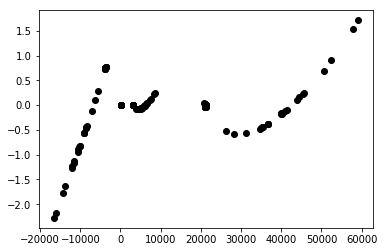

In [16]:
plt.plot(dw_XW, dw_T, 'o', color='black');

In [18]:
dw_T.shape

(50, 4)

In [20]:
dw_XWQT = dw_XW*dw_Q.T

In [11]:
dw_Y = np.mat([[4147],[4159],[4144],[4159],[4153],[4150],[4147],[4150],[4153],[4159],[4172],[4172],[4150],[4150],[4169],[4169],[4169],[4169],[4156],[4156],[4156],[4156],[4172],[4165],[4162],[4153],[4165],[4165],[4165],[4169],[4159],[4166],[4172],[4169],[4165],[4165],[4172],[4159],[4169],[4178],[4181],[4178],[4165],[4169],[4178],[4172],[4178],[4178],[4172],[4175]])

In [12]:
plt.plot(dw_Y, dw_XWQT, 'o', color='black');

NameError: name 'dw_XWQT' is not defined

In [13]:
dw_TQT = dw_T*dw_Q.T

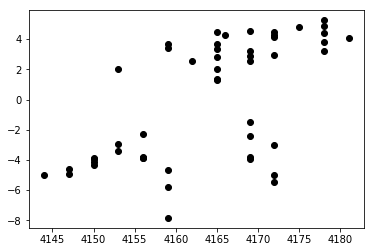

In [14]:
plt.plot(dw_Y, dw_TQT, 'o', color='black');

In [16]:
df_Y = pd.DataFrame(dw_Y)

In [17]:
df_TQT = pd.DataFrame(dw_TQT)

In [15]:
df_YY = pd.DataFrame()

In [18]:
df_YY['Y'] = df_Y[0]

In [19]:
df_YY['TQT'] = df_TQT[0]

In [20]:
corr = df_YY.corr()
corr*corr

,Y,TQT
Y,1.000000,0.386531
TQT,0.386531,1.000000


In [21]:
dw_Yhat = np.mat([[4159.44203],[4156.180677],[4159.020086],[4158.251989],[4161.092112],[4159.689107],[4159.105774],[4159.883108],[4160.602812],[4159.336002],[4158.570953],[4159.003622],[4160.090045],[4160.123279],[4162.520284],[4160.109299],[4161.601216],[4160.187859],[4160.145327],[4160.23237],[4161.73281],[4160.150855],[4160.977213],[4166.035307],[4166.54411],[4166.059248],[4165.322776],[4165.398959],[4167.708993],[4167.240457],[4167.706357],[4168.291402],[4168.305642],[4166.913285],[4168.506767],[4167.351591],[4168.496355],[4167.409955],[4166.544206],[4168.454456],[4168.102848],[4167.230895],[4166.861931],[4168.59054],[4168.897431],[4168.155243],[4167.809873],[4169.272287],[4166.937893],[4168.802362]])

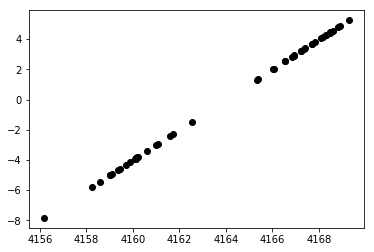

In [22]:
plt.plot(dw_Yhat, dw_TQT, 'o', color='black');

In [46]:
dw_X.I.shape

(7, 50)

In [25]:
dw_Ypred = np.mat([[4133.722937],[4150.49341],[4169.596871],[4165.719895],[4161.57261],[4169.036623],[4165.26619],[4167.328632],[4173.589673],[4150.403588],[4147.930059],[4169.725673],[4171.160005],[4174.377561],[4149.937631],[4155.923846],[4171.753156],[4155.93592],[4157.512126],[4158.460615],[4136.870875],[4149.459439],[4128.344635],[4196.18564],[4141.084887],[4191.665553],[4183.836513],[4198.101325],[4195.113228],[4201.237641],[4191.065467],[4193.026267],[4179.753136],[4190.512418],[4197.344026],[4201.031711],[4189.981654],[4193.445957],[4201.268172],[4159.658247],[4156.413151],[4171.463632],[4168.253575],[4152.677713],[4156.073472],[4156.321482],[4152.774359],[4167.354796],[4154.587418],[4156.36309]])

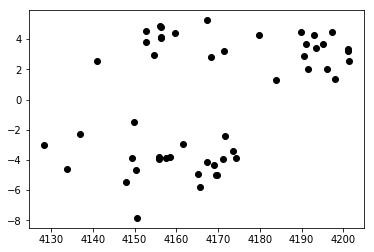

In [26]:
plt.plot(dw_Ypred, dw_TQT, 'o', color='black');

In [23]:
dw_XP = dw_X*dw_P
dw_XP

matrix([[ -14537.31963046,  105950.70801319, -721501.27016958,
           15259.0953962 ],
        [ -13965.59974096,  101794.13639733, -689684.46242888,
           14660.47429934],
        [  -8557.26670136,   62483.16630033, -385851.29260465,
            8998.99749375],
        [ -10835.11417092,   79040.16276025, -513726.31420779,
           11383.49887065],
        [ -16430.61164252,  119712.86288782, -827722.76397248,
           17241.09039523],
        [ -10638.1216145 ,   77608.64860668, -502528.33010672,
           11177.33582656],
        [ -12268.78180168,   89461.32645747, -594139.56648867,
           12884.33170571],
        [ -12147.05929608,   88576.72818821, -587209.00038643,
           12756.93403493],
        [  -7329.58506762,   53559.67859562, -316849.99555378,
            7713.85705301],
        [  -8651.01675598,   63164.64918639, -391053.02827658,
            9097.14316912],
        [ -11697.7495264 ,   85310.47488666, -562123.57422363,
           12286.53519386],

In [47]:
dw_W,dw_W.I,dw_W.T

(matrix([[ -4.00078085e-01,  -8.87433055e-01,   4.85052764e-03,
           -6.13690600e+00],
         [ -9.16174943e-01,   3.93705731e-01,  -1.58748645e-03,
            2.72070569e+00],
         [  2.13647974e-03,   2.06260716e-02,   1.62544306e-03,
            1.42954403e-01],
         [  1.65681696e-02,   1.71141581e-01,   1.41874080e-02,
            1.18356236e+00],
         [  1.64357839e-02,   1.58858202e-01,   1.41870543e-02,
            1.09778331e+00],
         [  3.11702604e-03,   4.79497738e-02,   4.14340813e-03,
            3.33153659e-01],
         [  1.44221062e-03,   1.44355456e-02,   1.07607413e-03,
            9.99617321e-02]]),
 matrix([[ -4.02269942e-01,  -9.13669077e-01,  -1.79246499e-01,
           -7.33992455e-02,   3.90182077e-01,  -8.73364131e-01,
           -7.74538207e-02],
         [ -9.59942509e+00,   1.03537904e+01,  -7.20923669e+02,
           -3.57423023e+02,   1.48569107e+03,  -3.48370832e+03,
           -3.13574216e+02],
         [  1.07892452e+01,  -3.5

In [26]:
dw_XW = dw_X*dw_W
dw_XW

matrix([[-14299.75002453,   7568.09129156,     93.30246181,  52302.89338956],
        [-13735.76635297,   7321.64392548,     93.93966372,  50599.807074  ],
        [ -8399.22361131,   5034.6698552 ,    103.65100675,  34795.68309405],
        [-10646.79369742,   5999.19560385,     99.672905  ,  41461.03742678],
        [-16167.82971805,   8371.26275616,     90.10873447,  57853.21649718],
        [-10452.35969957,   5917.6893659 ,    100.17961689,  40897.79078408],
        [-12061.36781056,   6607.44464259,     97.2650041 ,  45664.34531842],
        [-11941.23028058,   6556.95316584,     97.57222857,  45315.42099119],
        [ -7187.83115909,   4515.75661992,    105.87661939,  31209.73083386],
        [ -8491.71307937,   5074.82749278,    103.5332871 ,  35073.18724313],
        [-11497.95099221,   6364.84427693,     98.19852538,  43987.85165818],
        [-10202.33337163,   5809.23914431,    100.52778069,  40148.34238215],
        [ -9036.74664098,   5310.14002028,    102.68833936,  366

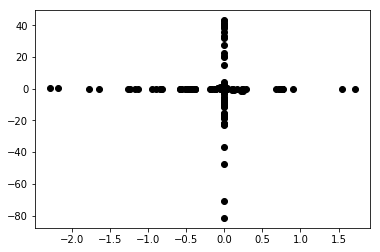

In [33]:
plt.plot(dw_T, dw_XTIP, 'o', color='black');

In [63]:
plt.plot(dw_T, (dw_W*dw_X.I).T, 'o', color='black');

ValueError: shapes (7,4) and (7,50) not aligned: 4 (dim 1) != 7 (dim 0)

In [34]:
dw_XTIP.shape, dw_T.shape

((50, 4), (50, 4))

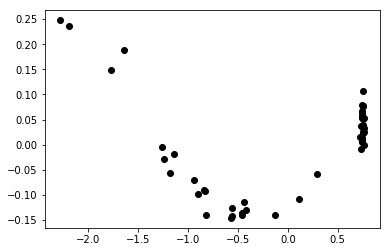

In [45]:
plt.plot(dw_T[:,0], dw_XTIW[:,0], 'o', color='black');

In [43]:
dw_XTIW = dw_X.T.I*dw_W
dw_XTIW

matrix([[  1.48479778e-01,   5.15223331e-01,   1.93618416e-02,
           3.57016276e+00],
        [  1.88620523e-01,   8.76202369e-01,   4.56791377e-02,
           6.07713448e+00],
        [ -1.29558453e-01,  -7.45749428e-01,  -4.62571854e-02,
          -5.17934852e+00],
        [ -7.05405199e-02,   1.78398034e-01,   3.52469909e-02,
           1.24951179e+00],
        [  2.36894423e-01,   1.11409258e-01,  -4.90985511e-02,
           7.52139549e-01],
        [ -9.74298093e-02,  -4.89820709e-01,  -2.72376628e-02,
          -3.39960638e+00],
        [ -5.61075265e-03,   4.27380423e-01,   4.62121410e-02,
           2.97612700e+00],
        [ -2.82052917e-02,   2.74384641e-01,   3.39077210e-02,
           1.91486756e+00],
        [ -1.40988853e-01,  -4.56007423e-01,  -1.31820904e-02,
          -3.16029564e+00],
        [ -1.13781312e-01,  -2.70634577e-01,   1.31301498e-03,
          -1.87362591e+00],
        [ -1.83261308e-02,   5.19892563e-01,   5.76795771e-02,
           3.62164712e+00],